## Parte II. Mínimos cuadrados

*Regresión generalizada*

Dados n puntos $(x_i,y_i)$, el objetivo es encontrar el polinomio de grado máximo $p$ que minimize la suma de los errores cuadrados:
$$min\sum_{i=1}^{n}(y_i-f(x_i))^2$$
Discute los casos:
$$f(x)=a_0+a_1x+a_2x^2+\dots+a_px^p$$
$$f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

---
Generamos datos sintéticos con ruido en dos funciones, una que ajuste $f(x)=a_0+a_1x+a_2x^2+\dots+a_px^p$ y otra $f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$, las cuales serán:
1. $y = 2 + 3x - x^2$
2. $y = 2 + 3cos(x) - cos(2x)$


In [3]:
n = 100  # Número de puntos de datos
x = np.linspace(0, 10, n)
y = 2 + 3 * x - 1 * x**2
noise = np.random.normal(0, 2, size=n)
y_cosine = 2 + 3 * np.cos(x) + -1 * np.cos(2 * x)
y = y + noise
y_cosine = y_cosine + noise

Visualizamos cómo son los datos para ambas funciones

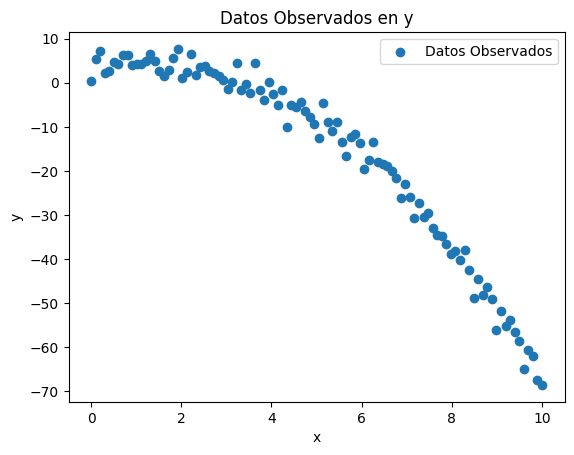

In [4]:
plt.scatter(x, y, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados en y')
plt.legend()
plt.show()

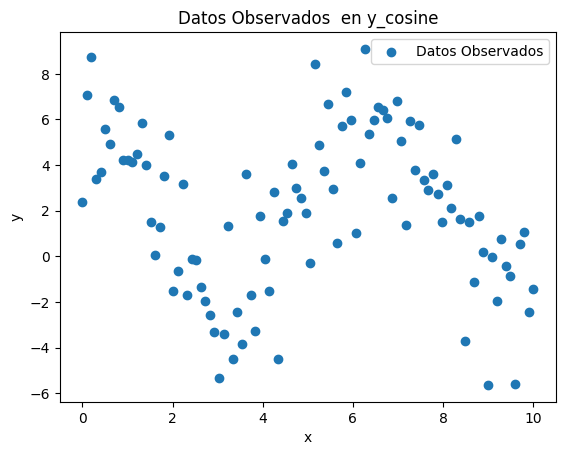

In [5]:
plt.scatter(x, y_cosine, label='Datos Observados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Observados  en y_cosine')
plt.legend()
plt.show()

diseñamos una función que ajuste el polinomio de grado p que minimize la suma de los errores cuadrados dado un conjunto de datos observados $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, el objetivo es encontrar un polinomio de grado $p$:
$$f(x) = a_0 + a_1x + a_2x^2 + \dots + a_p x^p$$
cuyos coeficientes $a_0, a_1, \dots, a_p$ minimicen el error cuadrático medio, definido como:
$$E = \sum_{i=1}^{n} \left( y_i - f(x_i) \right)^2$$
Para resolver esto, el problema se formula en términos matriciales:
1. Se construye la matriz de diseño $A$, donde cada fila corresponde a una evaluación del polinomio en una entrada $x_i$:
$$A =
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^p \\
1 & x_2 & x_2^2 & \cdots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^p
\end{bmatrix}$$
Esta matriz tiene dimensión $n \times (p+1)$.
2. Se resuelve el sistema normal asociado al método de mínimos cuadrados:
$$A^T A \mathbf{a} = A^T \mathbf{y}$$
donde:
* $A^T$: la transpuesta de la matriz $A$,
* $\mathbf{a} = [a_0, a_1, \dots, a_p]^T$: el vector de coeficientes que queremos encontrar,
* $\mathbf{y} = [y_1, y_2, \dots, y_n]^T$: el vector de valores observados.

3. El sistema normal se resuelve usando la función **np.linalg.solve**, que encuentra $\mathbf{a}$ al resolver la ecuación:
$$a=(A^TA)^{−1}A^Ty.$$


In [6]:
def polynomial_fit(x, y, p):
    """
    Ajusta un polinomio de grado p a los datos dados y devuelve los valores ajustados y los coeficientes.

    Args:
        x (array-like): Valores independientes.
        y (array-like): Valores dependientes.
        p (int): Grado del polinomio.

    Returns:
        tuple: y_fit (valores ajustados) y coefficients (coeficientes del polinomio).
    """
    # Inicializar la matriz de diseño A
    A = np.zeros((len(x), p + 1))
    for i in range(len(x)):
        for j in range(p + 1):
            A[i, j] = x[i] ** j
    # calcular coeficientes del polinomio
    AtA = A.T @ A
    AtY = A.T @ y
    coefficients = np.linalg.solve(AtA, AtY)
    # calcular el valor de y con los coeficientes obtenidos
    def polynomial(x_vals, coeffs):
        y_vals = np.zeros_like(x_vals)
        for j, a_j in enumerate(coeffs):
            y_vals += a_j * x_vals ** j
        return y_vals
    y_fit = polynomial(x, coefficients)

    return y_fit, coefficients

Mientras que para el caso de series coseno siguimos el mismo procedimiento solo que en este caso se ajustará una serie grado p:
$$f(x)=a_0+a_1\cos{(x)}+a_2\cos{(2x)}+\dots+a_p\cos{(px)}$$
y $A$ se representa como:
$$A =
\begin{bmatrix}
1 & \cos(1 \cdot x_1) & \cos(2 \cdot x_1) & \cdots & \cos(p \cdot x_1) \\
1 & \cos(1 \cdot x_2) & \cos(2 \cdot x_2) & \cdots & \cos(p \cdot x_2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \cos(1 \cdot x_n) & \cos(2 \cdot x_n) & \cdots & \cos(p \cdot x_n)
\end{bmatrix}$$

In [7]:
def cosine_series_fit(x, y, p):
    """
    Ajusta una seri coseno de grado p a los datos dados y devuelve los valores ajustados y los coeficientes.

    Args:
        x (array-like): Valores independientes.
        y (array-like): Valores dependientes.
        p (int): Grado de la serie.

    Returns:
        tuple: y_fit (valores ajustados) y coefficients (coeficientes de la serie).
    """
    # Inicializar la matriz de diseño A
    A = np.zeros((len(x), p + 1))
    for i in range(len(x)):
        for j in range(p + 1):
            A[i, j] = np.cos(j * x[i])
    # calcular coeficientes del polinomio
    AtA = A.T @ A
    AtY = A.T @ y
    coefficients = np.linalg.solve(AtA, AtY)
    # calcular el valor de y con los coeficientes obtenidos
    def cosine_series(x_vals, coeffs):
        y_vals = np.zeros_like(x_vals)
        y_vals += coeffs[0]  # Agregar el término constante a_0
        for j in range(1, len(coeffs)):
            y_vals += coeffs[j] * np.cos(j * x_vals)
        return y_vals
    y_fit = cosine_series(x, coefficients)

    return y_fit, coefficients

Visualizamos el ajuste de diferentes polinomios para los datos de $y$

Coeficientes:  [ 2.70199393  2.67614355 -0.96570507]
Suma de Errores Cuadrados para el Ajuste Polinómico: 479.28513289657207


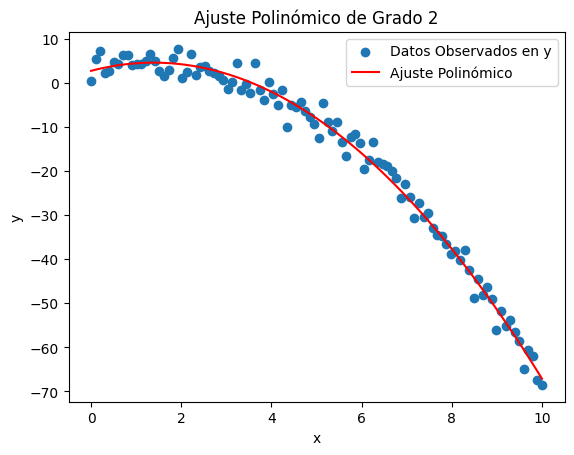

In [17]:
p = 2 # grado del polinomio
y_fit_poly, coefficients = polynomial_fit(x,y,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste polinómico
residuals = y - y_fit_poly
sse_poly = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Polinómico:", sse_poly)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y, label='Datos Observados en y')
plt.plot(x, y_fit_poly, 'r', label='Ajuste Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Grado {}'.format(p))
plt.legend()
plt.show()


Coeficientes:  [ 1.77828313e+00  2.29519459e+01 -6.39697967e+01  8.81578619e+01
 -6.93100669e+01  3.34294928e+01 -1.03490254e+01  2.10089568e+00
 -2.78381959e-01  2.19308554e-02 -2.98058631e-04 -1.71977348e-04
  1.92474318e-05 -1.97127967e-07 -1.61645316e-08 -1.74153457e-08
  1.35381047e-09  2.21324416e-10 -3.82238866e-11  2.12236570e-12
 -4.22084927e-14]
Suma de Errores Cuadrados para el Ajuste Polinómico: 432.67823862805517


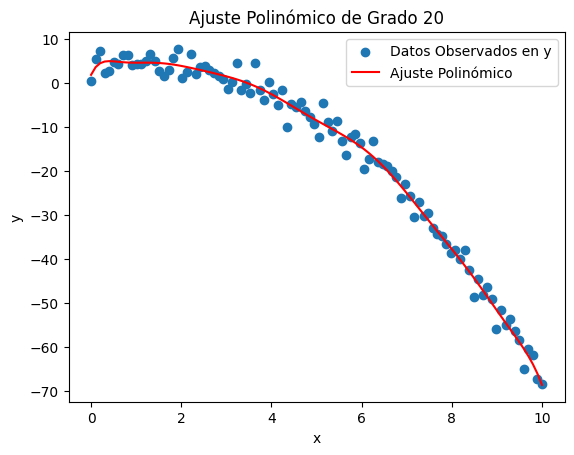

In [13]:
p = 20
y_fit_poly, coefficients = polynomial_fit(x,y,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste polinómico
residuals = y - y_fit_poly
sse_poly = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Polinómico:", sse_poly)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y, label='Datos Observados en y')
plt.plot(x, y_fit_poly, 'r', label='Ajuste Polinómico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Grado {}'.format(p))
plt.legend()
plt.show()


Ahora para las series de coseno

Coeficientes:  [ 2.24505702  3.70544269 -0.53940534]
Suma de Errores Cuadrados para el Ajuste Serie Coseno: 452.0016292548416


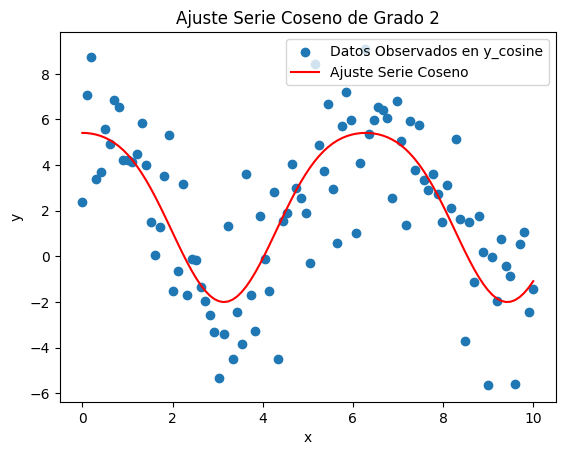

In [14]:
p = 2 # grado de la serie
y_fit_cosine, coefficients = cosine_series_fit(x,y_cosine,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste Serie Coseno
residuals = y_cosine - y_fit_cosine
sse_cosine = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Serie Coseno:", sse_cosine)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y_cosine, label='Datos Observados en y_cosine')
plt.plot(x, y_fit_cosine, 'r', label='Ajuste Serie Coseno')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Serie Coseno de Grado {}'.format(p))
plt.legend()
plt.show()


Coeficientes:  [ 2.2450177   3.69602208 -0.53624462  0.0610028  -0.05504628  0.1159695
  0.12631955  0.14105448 -0.11718206 -0.24913643  0.19662407 -0.08786488
  0.0224799   0.00820252  0.09119751 -0.04784044  0.34221948  0.29055774
  0.1306771  -0.27741735 -0.2844043 ]
Suma de Errores Cuadrados para el Ajuste Serie Coseno: 424.48643800952743


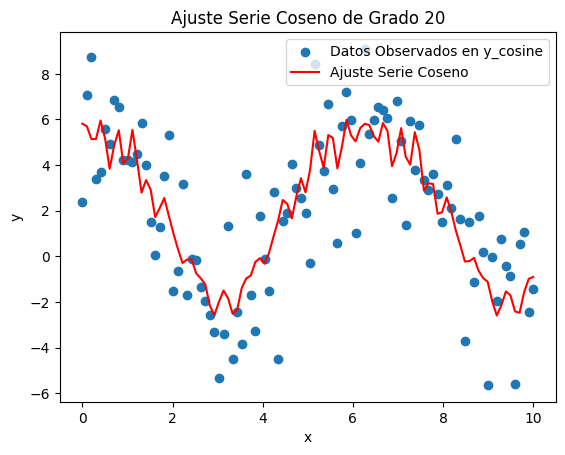

In [15]:
p = 20
y_fit_cosine, coefficients = cosine_series_fit(x,y_cosine,p)
print('Coeficientes: ',coefficients)
# SSE para el ajuste Serie Coseno
residuals = y_cosine - y_fit_cosine
sse_cosine = np.sum(residuals ** 2)
print("Suma de Errores Cuadrados para el Ajuste Serie Coseno:", sse_cosine)
# Graficar los datos y el polinomio ajustado
plt.scatter(x, y_cosine, label='Datos Observados en y_cosine')
plt.plot(x, y_fit_cosine, 'r', label='Ajuste Serie Coseno')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Serie Coseno de Grado {}'.format(p))
plt.legend()
plt.show()


Observamos que, en ambos casos, la serie se ajusta adecuadamente. Además, al aumentar el grado del polinomio o de la serie, se logra una reducción en la suma de errores cuadráticos.